<a href="https://colab.research.google.com/github/Ajay-kumarv/music-makes-an-impact/blob/main/FAANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

data_frame = pd.read_csv("/content/data.csv")
data_frame = data_frame.drop("Unnamed: 0", axis="columns")
data_frame.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_df, test_df = train_test_split(data_frame, test_size=0.2, random_state=123)

In [5]:
train_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1505,0.00477,0.585,214740,0.614,0.000155,10,0.0762,-5.594,0,0.0370,114.059,4.0,0.2730,0,Cool for the Summer,Demi Lovato
813,0.11400,0.665,216728,0.513,0.303000,0,0.1220,-7.314,1,0.3310,100.344,3.0,0.0373,1,Damn Son Where'd You Find This? (feat. Kelly H...,Markus Maximus
615,0.03020,0.798,216585,0.481,0.000000,7,0.1280,-10.488,1,0.3140,127.136,4.0,0.6400,1,Trill Hoe,Western Tink
319,0.10600,0.912,194040,0.317,0.000208,6,0.0723,-12.719,0,0.0378,99.346,4.0,0.9490,1,Who Is He (And What Is He to You?),Bill Withers
320,0.02110,0.697,236456,0.905,0.893000,6,0.1190,-7.787,0,0.0339,119.977,4.0,0.3110,1,Acamar,Frankey


In [6]:
train_df.shape, test_df.shape

((1613, 16), (404, 16))

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 1505 to 1534
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1613 non-null   float64
 1   danceability      1613 non-null   float64
 2   duration_ms       1613 non-null   int64  
 3   energy            1613 non-null   float64
 4   instrumentalness  1613 non-null   float64
 5   key               1613 non-null   int64  
 6   liveness          1613 non-null   float64
 7   loudness          1613 non-null   float64
 8   mode              1613 non-null   int64  
 9   speechiness       1613 non-null   float64
 10  tempo             1613 non-null   float64
 11  time_signature    1613 non-null   float64
 12  valence           1613 non-null   float64
 13  target            1613 non-null   int64  
 14  song_title        1613 non-null   object 
 15  artist            1613 non-null   object 
dtypes: float64(10), int64(4), object(2)
mem

In [8]:
train_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185627,0.616745,247114.827650,0.681296,0.136862,5.383137,0.189189,-7.112929,0.621203,0.091277,121.979777,3.964662,0.497587,0.507750
std,0.259324,0.163225,81177.300308,0.211612,0.277744,3.620422,0.153170,3.838867,0.485238,0.087890,26.965641,0.255201,0.247378,0.500095
min,0.000005,0.122000,16042.000000,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.035900,0.000000
25%,0.009190,0.511000,200105.000000,0.564000,0.000000,2.000000,0.092300,-8.388000,0.000000,0.037300,100.518000,4.000000,0.295000,0.000000
50%,0.062500,0.629000,230200.000000,0.714000,0.000071,6.000000,0.127000,-6.248000,1.000000,0.054900,121.990000,4.000000,0.496000,1.000000
75%,0.251000,0.738000,272533.000000,0.844000,0.057300,9.000000,0.243000,-4.791000,1.000000,0.107000,137.932000,4.000000,0.690000,1.000000
max,0.995000,0.984000,849960.000000,0.997000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [9]:
numeric_features = list(train_df.select_dtypes('number').columns)

In [10]:
import altair as alt
alt.renderers.enable('kaggle')

RendererRegistry.enable('kaggle')

In [11]:
alt.Chart(train_df).mark_bar(opacity = 0.6).encode(
     alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=60)),
     y=alt.Y('count()', stack=False),
    color = 'target:N'
).properties(
    width=300,
    height=200
).repeat(
    numeric_features, columns = 3
) 

alt.RepeatChart(...)

In [13]:
import seaborn as sns

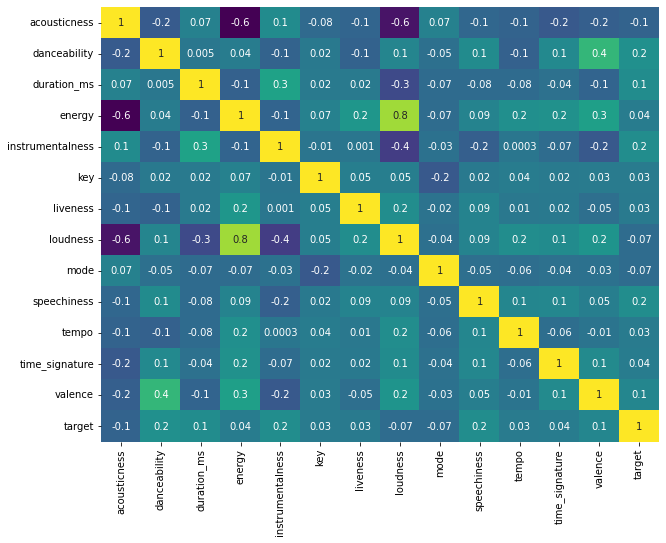

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_frame.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False);

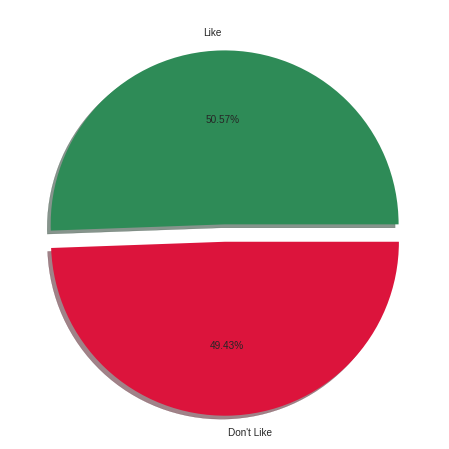

In [15]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=data_frame["target"].value_counts(), 
        colors=["seagreen","crimson"], 
        labels=["Like", "Don't Like"],
        shadow = True, 
        explode = (0, 0.1),
        autopct="%1.2f%%", 
        )
plt.show()

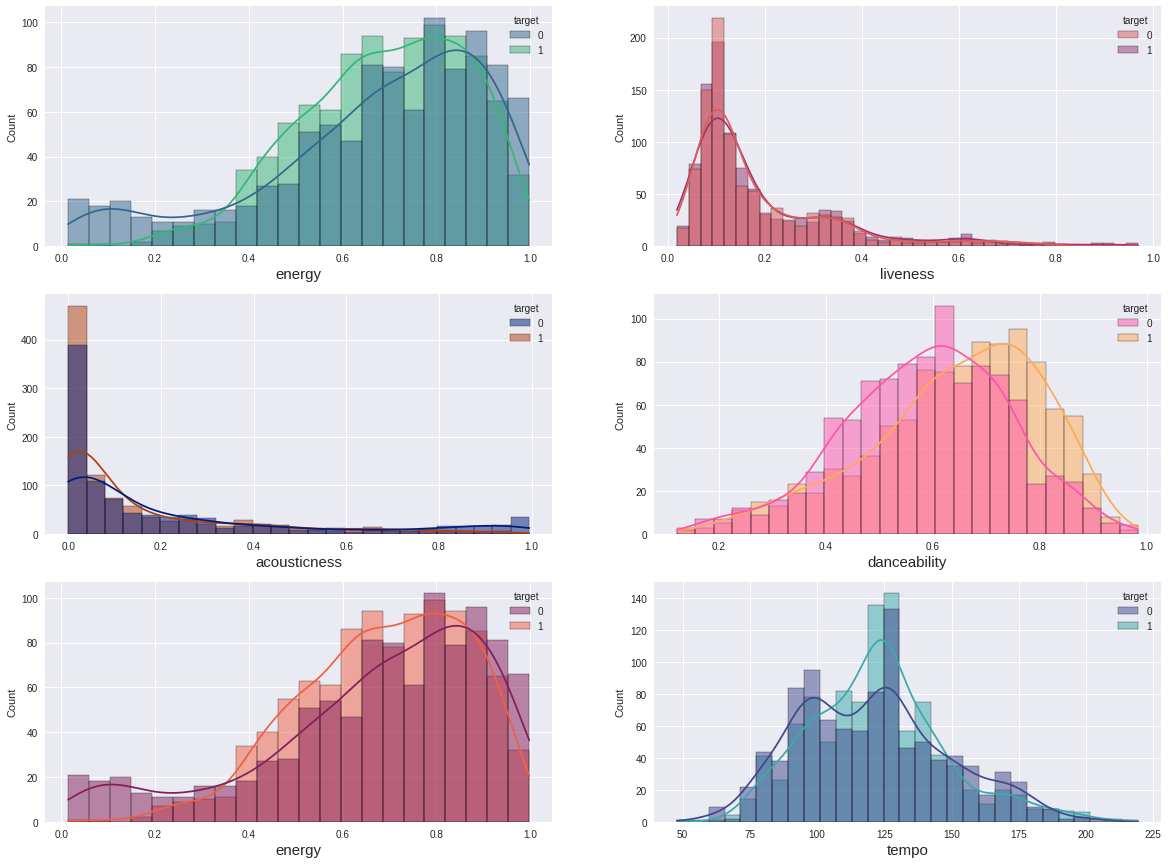

In [16]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,2, figsize=(20,15)) 


sns.histplot(x = data_frame["energy"], hue = data_frame["target"], kde=True, ax=ax[0,0], palette="viridis");
ax[0,0].set_xlabel("energy",fontsize=15);

sns.histplot(x = data_frame["liveness"], hue = data_frame["target"], kde=True, ax=ax[0,1], palette="flare");
ax[0,1].set_xlabel("liveness",fontsize=15);

sns.histplot(x = data_frame["acousticness"], hue = data_frame["target"], kde=True, ax=ax[1,0], palette="dark");
ax[1,0].set_xlabel("acousticness",fontsize=15);

sns.histplot(x = data_frame["danceability"], hue = data_frame["target"], kde=True, ax=ax[1,1], palette="spring");
ax[1,1].set_xlabel("danceability",fontsize=15);

sns.histplot(x = data_frame["energy"], hue = data_frame["target"], kde=True, ax=ax[2,0], palette="rocket");
ax[2,0].set_xlabel("energy",fontsize=15);

sns.histplot(x = data_frame["tempo"], hue = data_frame["target"], kde=True, ax=ax[2,1], palette="mako");
ax[2,1].set_xlabel("tempo",fontsize=15);

# New Section

# New Section